<a href="https://colab.research.google.com/github/MalykaMabom205/Code/blob/main/2022_2023QuestionPro_SR_RawData_11039098_06_30_2025_T110758_007_xlsx6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 2022-2023QuestionPro-SR-RawData-11039098-06-30-2025-T110758.007.xlsx to 2022-2023QuestionPro-SR-RawData-11039098-06-30-2025-T110758.007 (1).xlsx


In [ ]:
# This cell has been moved after the cell that defines `raw_data`
# print(raw_data.columns.tolist())

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the raw data sheet
raw_data = pd.read_excel('2022-2023QuestionPro-SR-RawData-11039098-06-30-2025-T110758.007.xlsx', sheet_name='Raw Data')

print(f"Number of rows: {len(raw_data)}")
print(f"Number of features: {len(raw_data.columns)}")

# Check for missing values
print("\nMissing values per column:")
print(raw_data.isnull().sum())

# Print column names after raw_data is defined
print("\nColumn names:")
print(raw_data.columns.tolist())

Number of rows: 12
Number of features: 54

Missing values per column:
Response ID                                                                                                                                   1
Response Status                                                                                                                               1
IP Address                                                                                                                                    1
Timestamp (mm/dd/yyyy)                                                                                                                        1
Duplicate                                                                                                                                     1
Time Taken to Complete (Seconds)                                                                                                              1
Seq. Number                                                       

/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


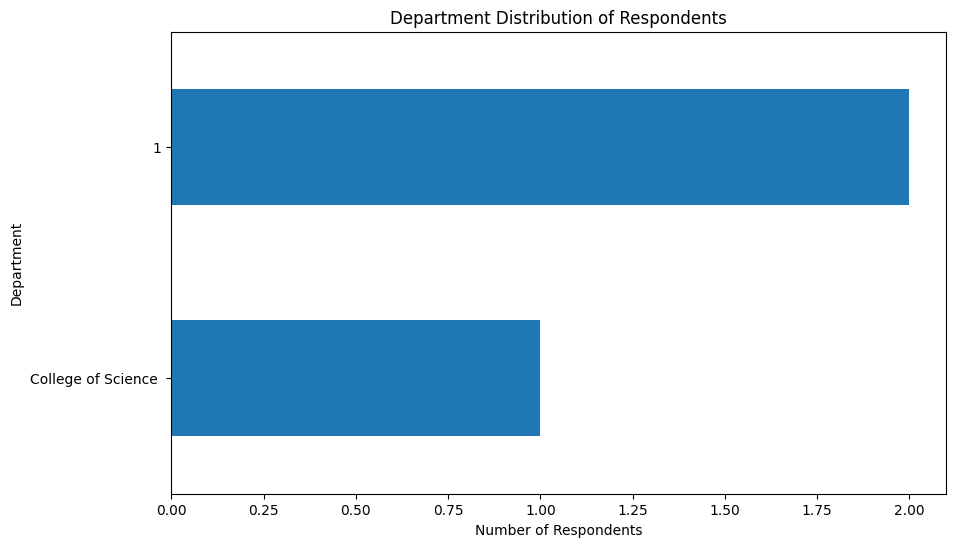

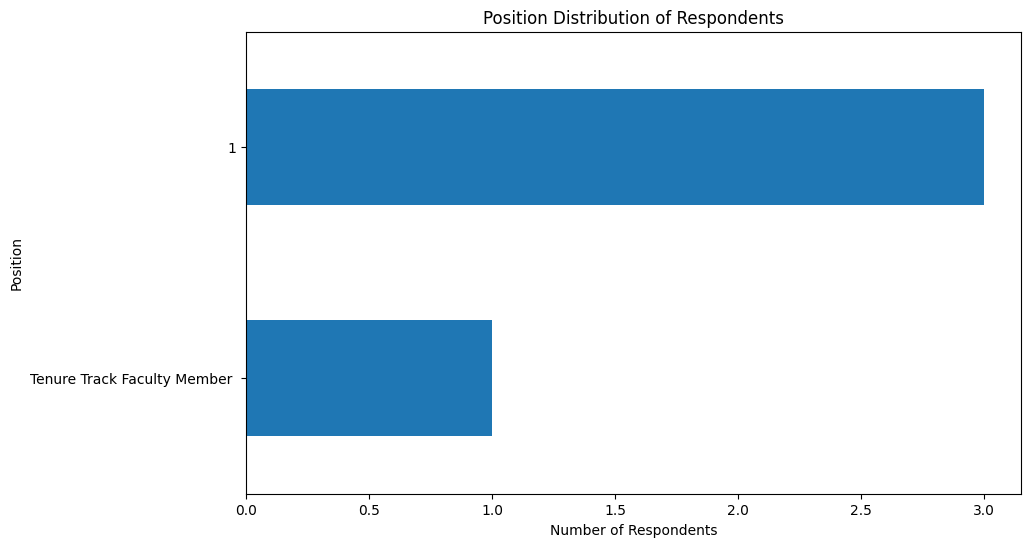

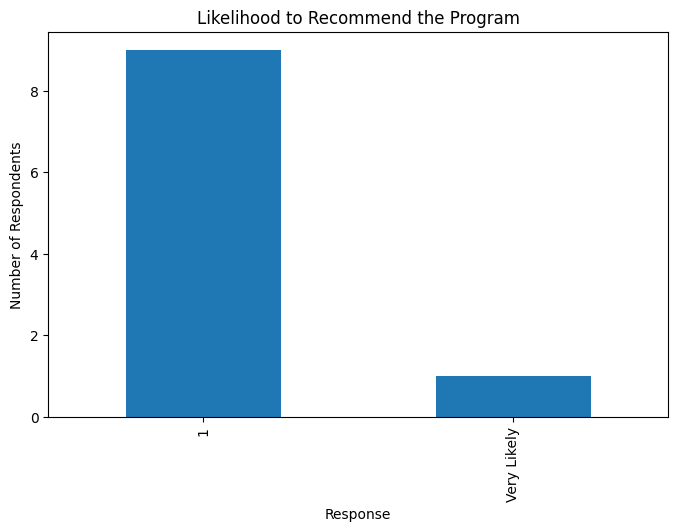

In [ ]:
import matplotlib.pyplot as plt

# Department distribution
dept_counts = raw_data['UTA Department/School/Division'].value_counts()

plt.figure(figsize=(10,6))
dept_counts.sort_values().plot(kind='barh')
plt.title('Department Distribution of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Department')
plt.show()

# Position distribution
position_counts = raw_data['Position at UTA'].value_counts()

plt.figure(figsize=(10,6))
position_counts.sort_values().plot(kind='barh')
plt.title('Position Distribution of Respondents')
plt.xlabel('Number of Respondents')
plt.ylabel('Position')
plt.show()

# Likelihood to recommend
recommend_counts = raw_data['How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?'].value_counts()

plt.figure(figsize=(8,5))
recommend_counts.plot(kind='bar')
plt.title('Likelihood to Recommend the Program')
plt.xlabel('Response')
plt.ylabel('Number of Respondents')
plt.show()


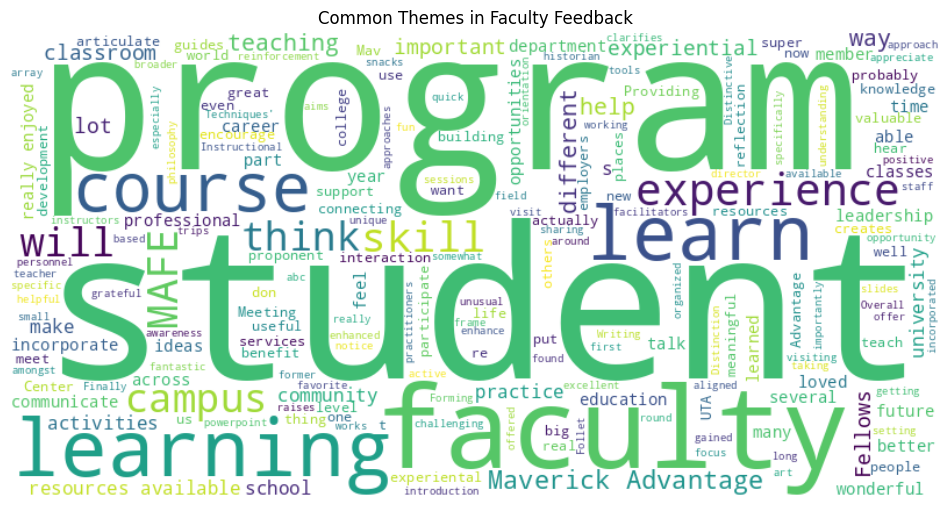

In [ ]:
from wordcloud import WordCloud

# Combine all text responses
all_text = ' '.join(raw_data['What was your favorite part of being in the MAFE Faculty Fellows Program?'].dropna()) + ' ' + \
           ' '.join(raw_data['Why do you think the MAFE Faculty Fellows Program is important ?'].dropna()) + ' ' + \
           ' '.join(raw_data['How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Faculty Feedback')
plt.show()

In [ ]:
# Convert teaching start date to months of experience
from datetime import datetime
import pandas as pd # Import pandas here as well

def months_of_experience(date_str):
    if pd.isna(date_str):  # Handle missing values
        return None
    try:
        # Convert to string before attempting to parse
        start_date = datetime.strptime(str(date_str), '%m/%Y')
        months = (datetime.now() - start_date).days // 30
        return months
    except ValueError:
        return None  # Handle unexpected formats

raw_data['Months at UTA'] = raw_data['How long have you taught at UTA (month & year you began) ?'].apply(months_of_experience)

# One-hot encode categorical features
# (Already mostly one-hot encoded in original data)

# Convert likelihood to recommend to numerical (1-5 scale)
# This part was previously incorrect and is now handled in a separate cell (8hGOs3BJGq1v)

# For text analysis, we'll create sentiment scores
from textblob import TextBlob # Import TextBlob here

def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity # Ensure text is a string

text_columns = ['What was your favorite part of being in the MAFE Faculty Fellows Program?',
               'Why do you think the MAFE Faculty Fellows Program is important ?',
               'How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?',
               'What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students?',
               'What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class?',
               'What suggestions do you have to improve the MAFE Faculty Fellows Program ?']

for col in text_columns:
    raw_data[f'{col} Sentiment'] = raw_data[col].apply(get_sentiment)

In [ ]:
from datetime import datetime
import pandas as pd

def months_of_experience(date_str):
    if pd.isna(date_str):  # Handle missing values
        return None
    try:
        start_date = datetime.strptime(str(date_str), '%m/%Y')
        months = (datetime.now() - start_date).days // 30
        return months
    except ValueError:
        return None  # Handle unexpected formats

raw_data['Months at UTA'] = raw_data['How long have you taught at UTA (month & year you began) ?'].apply(months_of_experience)


In [ ]:
# Map the text answers to numerical scores
recommend_map = {
    "Very Likely": 1,
    "Somewhat Likely": 2,
    "Neutral": 3,
    "Somewhat Unlikely": 4,
    "Very Unlikely": 5
}

raw_data['Recommend Score'] = raw_data['How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?'].map(recommend_map)


In [ ]:
features = ['Months at UTA'] + \
           [col for col in raw_data.columns if 'College of' in col or 'Division of' in col or 'School of' in col] + \
           [col for col in raw_data.columns if 'Member' in col or 'Student' in col] + \
           [col for col in raw_data.columns if 'Sentiment' in col]

target = 'Recommend Score'

X = raw_data[features]
y = raw_data[target]


In [ ]:
# Show the first few rows with the new columns
cols_to_show = ['Months at UTA', 'Recommend Score'] + [col for col in raw_data.columns if 'Sentiment' in col]
print(raw_data[cols_to_show].head(10))


   Months at UTA  Recommend Score  \
0            NaN              1.0   
1          110.0              NaN   
2           61.0              NaN   
3          243.0              NaN   
4          303.0              NaN   
5           56.0              NaN   
6           73.0              NaN   
7          183.0              NaN   
8          268.0              NaN   
9          238.0              NaN   

   What was your favorite part of being in the MAFE Faculty Fellows Program? Sentiment  \
0                                           0.000000                                     
1                                           0.000000                                     
2                                           0.700000                                     
3                                           0.230128                                     
4                                           0.000000                                     
5                                           0.371667

In [ ]:
raw_data[cols_to_show].head(10)


,Months at UTA,Recommend Score,What was your favorite part of being in the MAFE Faculty Fellows Program? Sentiment,Why do you think the MAFE Faculty Fellows Program is important ? Sentiment,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses? Sentiment,"What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students? Sentiment",What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class? Sentiment,What suggestions do you have to improve the MAFE Faculty Fellows Program ? Sentiment
0,NaN,1.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
1,110.0,NaN,0.000000,0.195000,0.300000,0.283333,-0.5000,0.000000
2,61.0,NaN,0.700000,0.150000,0.000000,0.125000,0.2000,0.280000
3,243.0,NaN,0.230128,0.312500,0.000000,0.375000,0.2350,0.133102
4,303.0,NaN,0.000000,0.400000,0.466667,0.000000,0.2000,0.167857
5,56.0,NaN,0.371667,0.262179,0.333333,0.204063,0.2125,0.562500
6,73.0,NaN,0.045455,0.100000,0.018750,0.150000,0.6500,0.700000
7,183.0,NaN,0.075758,0.468182,0.050000,0.147619,0.2500,0.000000
8,268.0,NaN,0.700000,0.200000,0.500000,0.200000,0.0000,0.031250
9,238.0,NaN,0.208594,0.130000,0.321429,0.100000,0.4375,0.065625


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (be careful if it's huge)
raw_data.head(20)  # First 20 rows


,Response ID,Response Status,IP Address,Timestamp (mm/dd/yyyy),Duplicate,Time Taken to Complete (Seconds),Seq. Number,External Reference,Custom Variable 1,Custom Variable 2,Custom Variable 3,Custom Variable 4,Custom Variable 5,Respondent Email,Email List,Country Code,Region,MAFE FACULTY FELLOWS EXIT SURVEY: 2022-2023 COHORT,First Name,Last Name,Email Address,UTA Department/School/Division,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Position at UTA,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,How long have you taught at UTA (month & year you began) ?,What was your favorite part of being in the MAFE Faculty Fellows Program?,Why do you think the MAFE Faculty Fellows Program is important ?,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?.1,"What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students?",What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class?,What suggestions do you have to improve the MAFE Faculty Fellows Program ?,How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Months at UTA,What was your favorite part of being in the MAFE Faculty Fellows Program? Sentiment,Why do you think the MAFE Faculty Fellows Program is important ? Sentiment,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses? Sentiment,"What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students? Sentiment",What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class? Sentiment,What suggestions do you have to improve the MAFE Faculty Fellows Program ? Sentiment,Recommend Score
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College of Science,College of Engineering,College of Business,College of Education,School of Social Work,College of Nursing and Health Innovation,"College of Architecture, Planning, and Public ...",College of Liberal Arts,Honors College,UTA Libraries,Division of Student Success,Division of Student Affairs,Other,Tenure Track Faculty Member,Tenured Faculty Member,Non-Tenure Track Faculty Member,Adjunct Faculty Member,Graduate Student,Staff Member,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Likely,Somewhat Likely,Neutral,Somewhat Unlikely,Very Unlikely,NaN,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.0
1,162208199.0,Completed,129.107.80.121,2023-04-06 15:17:30,0.0,719.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,nicholas.pollock@uta.edu,2022-2023 MAFE Faculty Fellows,US,TX,NaN,Nicholas,Pollock,nicholas.pollock@uta.edu,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,08/2016,Learning about how to make my 4388 'Instructio...,Because it is very useful to learn about how t...,"Students gain greater skills in leadership, pr...",NaN,"As a course instructor and lab coordinator, le...",It's not as difficult as it may seem. A lot of...,NaN,NaN,1,NaN,NaN,NaN,110.0,0.000000,0.195000,0.300000,0.283333,-0.5000,0.000000,NaN
2,162233471.0,Completed,99.19.114.84,2023-04-07 10:23:27,0.0,548.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,fletcher.coleman@uta.edu,2022-2023 MAFE Faculty Fellows,US,TX,NaN,Fletcher,Coleman,fletcher.coleman@uta.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,08/2020,This program was an excellent introduction to ...,"I am a big proponent in taking a skills-based,...","Simply put, it broadens their horizons and pra...",NaN,Maverick Advantage provided the 

In [ ]:
from google.colab import data_table
data_table.DataTable(raw_data, num_rows_per_page=10)


,Response ID,Response Status,IP Address,Timestamp (mm/dd/yyyy),Duplicate,Time Taken to Complete (Seconds),Seq. Number,External Reference,Custom Variable 1,Custom Variable 2,Custom Variable 3,Custom Variable 4,Custom Variable 5,Respondent Email,Email List,Country Code,Region,MAFE FACULTY FELLOWS EXIT SURVEY: 2022-2023 COHORT,First Name,Last Name,Email Address,UTA Department/School/Division,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Position at UTA,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,How long have you taught at UTA (month & year you began) ?,What was your favorite part of being in the MAFE Faculty Fellows Program?,Why do you think the MAFE Faculty Fellows Program is important ?,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?.1,"What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students?",What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class?,What suggestions do you have to improve the MAFE Faculty Fellows Program ?,How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Months at UTA,What was your favorite part of being in the MAFE Faculty Fellows Program? Sentiment,Why do you think the MAFE Faculty Fellows Program is important ? Sentiment,How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses? Sentiment,"What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students? Sentiment",What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class? Sentiment,What suggestions do you have to improve the MAFE Faculty Fellows Program ? Sentiment,Recommend Score
0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College of Science,College of Engineering,College of Business,College of Education,School of Social Work,College of Nursing and Health Innovation,"College of Architecture, Planning, and Public ...",College of Liberal Arts,Honors College,UTA Libraries,Division of Student Success,Division of Student Affairs,Other,Tenure Track Faculty Member,Tenured Faculty Member,Non-Tenure Track Faculty Member,Adjunct Faculty Member,Graduate Student,Staff Member,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very Likely,Somewhat Likely,Neutral,Somewhat Unlikely,Very Unlikely,NaN,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,1.0
1,162208199.0,Completed,129.107.80.121,2023-04-06 15:17:30,0.0,719.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,nicholas.pollock@uta.edu,2022-2023 MAFE Faculty Fellows,US,TX,NaN,Nicholas,Pollock,nicholas.pollock@uta.edu,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,08/2016,Learning about how to make my 4388 'Instructio...,Because it is very useful to learn about how t...,"Students gain greater skills in leadership, pr...",NaN,"As a course instructor and lab coordinator, le...",It's not as difficult as it may seem. A lot of...,NaN,NaN,1,NaN,NaN,NaN,110.0,0.000000,0.195000,0.300000,0.283333,-0.5000,0.000000,NaN
2,162233471.0,Completed,99.19.114.84,2023-04-07 10:23:27,0.0,548.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,fletcher.coleman@uta.edu,2022-2023 MAFE Faculty Fellows,US,TX,NaN,Fletcher,Coleman,fletcher.coleman@uta.edu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,08/2020,This program was an excellent introduction to ...,"I am a big proponent in taking a skills-based,...","Simply put, it broadens their horizons and pra...",NaN,Maverick Advantage provided the 

In [ ]:
from datetime import datetime
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import numpy as np

# 1. Months at UTA
def months_of_experience(date_str):
    if pd.isna(date_str):
        return None
    try:
        start_date = datetime.strptime(str(date_str), '%m/%Y')
        months = (datetime.now() - start_date).days // 30
        return months
    except ValueError:
        return None

raw_data['Months at UTA'] = raw_data['How long have you taught at UTA (month & year you began) ?'].apply(months_of_experience)

# 2. Recommend Score mapping
recommend_map = {
    "Very Likely": 1,
    "Somewhat Likely": 2,
    "Neutral": 3,
    "Somewhat Unlikely": 4,
    "Very Unlikely": 5
}
raw_data['Recommend Score'] = raw_data['How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?'].map(recommend_map)

# 3. Sentiment columns
def get_sentiment(text):
    if pd.isna(text):
        return 0
    return TextBlob(str(text)).sentiment.polarity

text_columns = [
    'What was your favorite part of being in the MAFE Faculty Fellows Program?',
    'Why do you think the MAFE Faculty Fellows Program is important ?',
    'How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?',
    'What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students?',
    'What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class?',
    'What suggestions do you have to improve the MAFE Faculty Fellows Program ?'
]
for col in text_columns:
    raw_data[f'{col} Sentiment'] = raw_data[col].apply(get_sentiment)

# 4. Feature selection
features = ['Months at UTA'] + \
           [col for col in raw_data.columns if 'College of' in col or 'Division of' in col or 'School of' in col] + \
           [col for col in raw_data.columns if 'Member' in col or 'Student' in col] + \
           [col for col in raw_data.columns if 'Sentiment' in col]

target = 'Recommend Score'

X = raw_data[features]
y = raw_data[target]

# Ensure only numeric columns in X before scaling
X = X.select_dtypes(include=[np.number])

# Drop rows with missing target and align X
y = y.dropna()
X = X.loc[y.index]

# 5. Check dataset size and perform train/test split or train on all data
if len(X) < 5:
    print(f"⚠ Dataset too small for a proper split (n={len(X)}). Training on all data for demo.")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    print("\nClassification report (train set only, overfitting likely):")
    print(classification_report(y, y_pred))
else:
    # Normal split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    print("\nClassification report (test set):")
    print(classification_report(y_test, y_pred))

⚠ Dataset too small for a proper split (n=1). Training on all data for demo.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.11/dist-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



Classification report (train set only, overfitting likely):
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd # Ensure pandas is imported

# 1. Ensure only numeric columns in X
X = X.select_dtypes(include=[np.number])
y = y.dropna()
X = X.loc[y.index]  # align with y

# 2. Drop rows with missing target
# This step was already done above with y = y.dropna()

# 3. Drop rows with missing feature values
X = X.dropna()
y = y.loc[X.index] # Align y with X after dropping rows

# 4. Check dataset size
if len(X) == 0:
    print("⚠ Dataset is empty after cleaning. Cannot perform scaling or model training.")
elif len(X) < 5:
    print(f"⚠ Dataset too small for a proper split (n={len(X)}). Training on all data for demo.")
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    print("\nClassification report (train set only, overfitting likely):")
    print(classification_report(y, y_pred))
else:
    # Normal split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)
    print("\nClassification report (test set):")
    print(classification_report(y_test, y_pred))

# The print(classification_report(y_test, y_pred)) outside the else block
# will cause an error if len(X) < 5 because y_test and y_pred will not be defined.
# It's better to only print the report when a test set exists.
# print(classification_report(y_test, y_pred))

⚠ Dataset is empty after cleaning. Cannot perform scaling or model training.


/tmp/ipython-input-1581687172.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=recommend_counts.index, y=recommend_counts.values, palette="Blues_d")


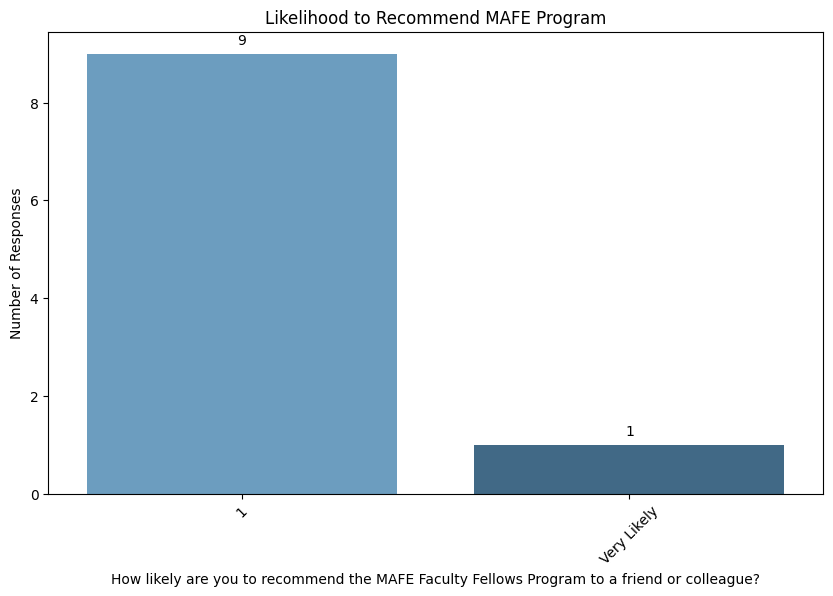

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts of each response in the recommendation column
recommend_counts = raw_data['How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=recommend_counts.index, y=recommend_counts.values, palette="Blues_d")
plt.title('Likelihood to Recommend MAFE Program')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45)
for i, v in enumerate(recommend_counts.values):
    plt.text(i, v+0.2, str(v), ha='center')
plt.show()

/tmp/ipython-input-3225195289.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  raw_data['Years at UTA'] = pd.to_datetime(raw_data['How long have you taught at UTA (month & year you began) ?'], errors='coerce').apply(lambda x: (pd.to_datetime('now') - x).days/365 if pd.notna(x) else None)


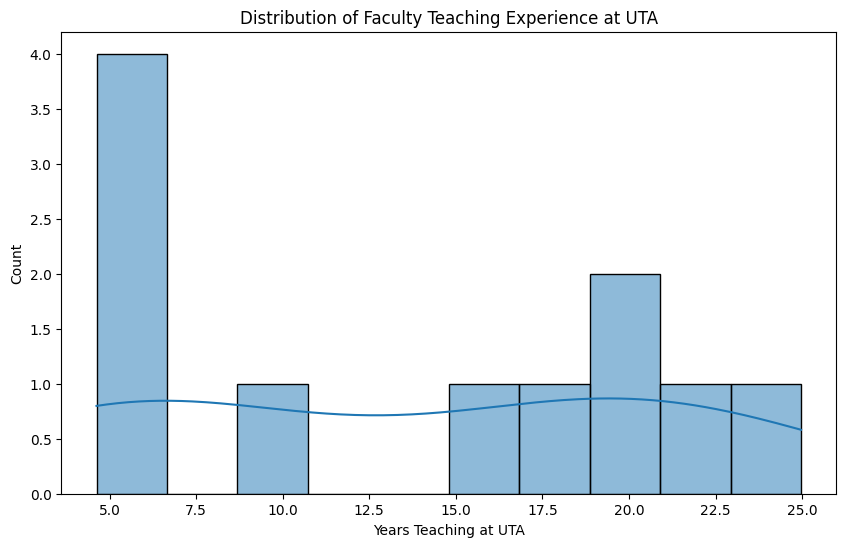

In [ ]:
# Convert start dates to years of experience
raw_data['Years at UTA'] = pd.to_datetime(raw_data['How long have you taught at UTA (month & year you began) ?'], errors='coerce').apply(lambda x: (pd.to_datetime('now') - x).days/365 if pd.notna(x) else None)

plt.figure(figsize=(10,6))
sns.histplot(data=raw_data, x='Years at UTA', bins=10, kde=True)
plt.title('Distribution of Faculty Teaching Experience at UTA')
plt.xlabel('Years Teaching at UTA')
plt.ylabel('Count')
plt.show()

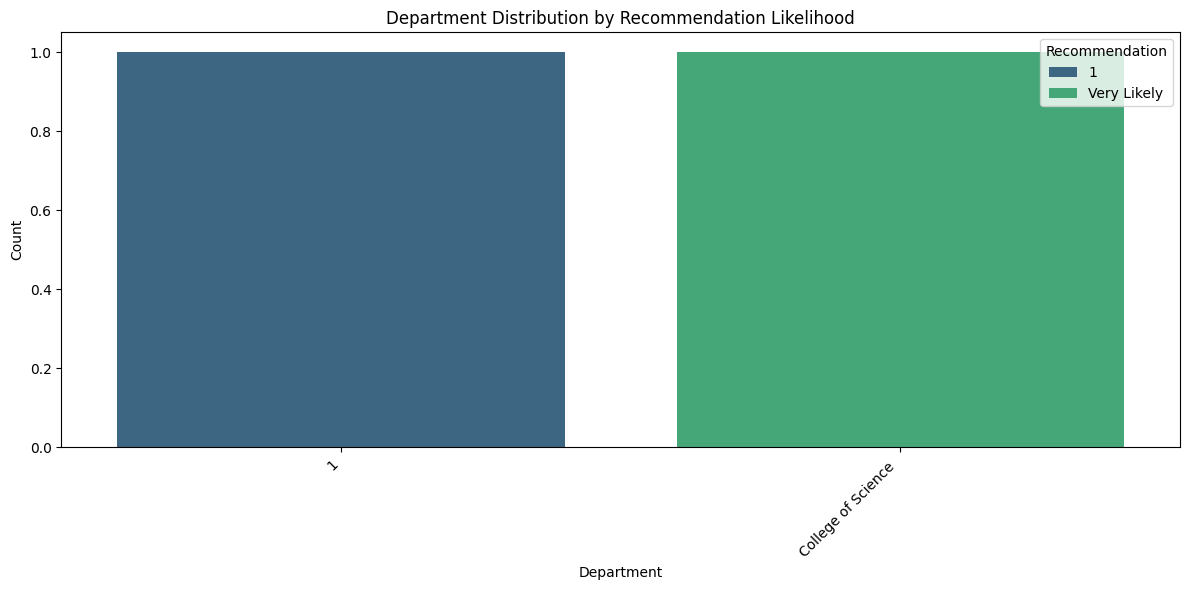

In [ ]:
# Identify relevant columns for departments and recommendation
# Based on the raw_data head, department information is in 'UTA Department/School/Division' and 'Unnamed: 22' through 'Unnamed: 33'
# Recommendation likelihood is in 'How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?'

# For simplicity and given the structure, let's first focus on the 'UTA Department/School/Division'
# and the 'How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?' columns

dept_recommend_df = raw_data[['UTA Department/School/Division', 'How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?']].copy()

# Drop rows with missing values in either of these columns for this analysis
dept_recommend_df.dropna(inplace=True)

# Rename the recommendation column for easier use
dept_recommend_df.rename(columns={'How likely are you to recommend the MAFE Faculty Fellows Program to a friend or colleague?': 'Recommendation Likelihood'}, inplace=True)

# Get the counts of each department within each recommendation category
dept_recommend_counts = dept_recommend_df.groupby(['UTA Department/School/Division', 'Recommendation Likelihood']).size().reset_index(name='Count')

plt.figure(figsize=(12,6))
sns.barplot(data=dept_recommend_counts, x='UTA Department/School/Division', y='Count', hue='Recommendation Likelihood', palette='viridis')
plt.title('Department Distribution by Recommendation Likelihood')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.legend(title='Recommendation')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

/tmp/ipython-input-2122322693.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=plot_data, x='Years at UTA', y='Time Taken to Complete (Seconds)',
/tmp/ipython-input-2122322693.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Recommend Score') # Update legend title


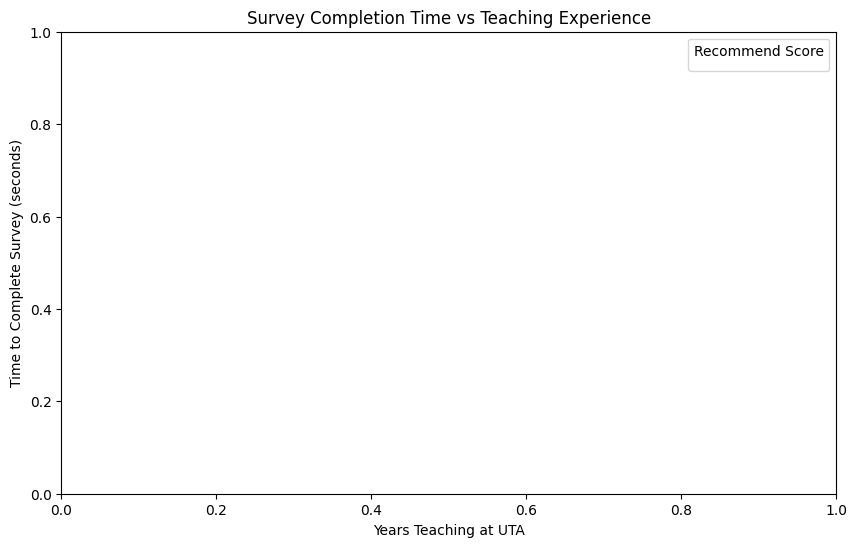

In [ ]:
# Drop rows with missing values in the columns used for the plot
plot_data = raw_data.dropna(subset=['Years at UTA', 'Time Taken to Complete (Seconds)', 'Recommend Score']).copy()

plt.figure(figsize=(10,6))
sns.scatterplot(data=plot_data, x='Years at UTA', y='Time Taken to Complete (Seconds)',
                hue='Recommend Score', palette='viridis', s=100) # Use 'Recommend Score' for hue
plt.title('Survey Completion Time vs Teaching Experience')
plt.xlabel('Years Teaching at UTA')
plt.ylabel('Time to Complete Survey (seconds)')
plt.legend(title='Recommend Score') # Update legend title
plt.show()

/tmp/ipython-input-2194751995.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=text_cols, y=sentiment_scores, palette="viridis")


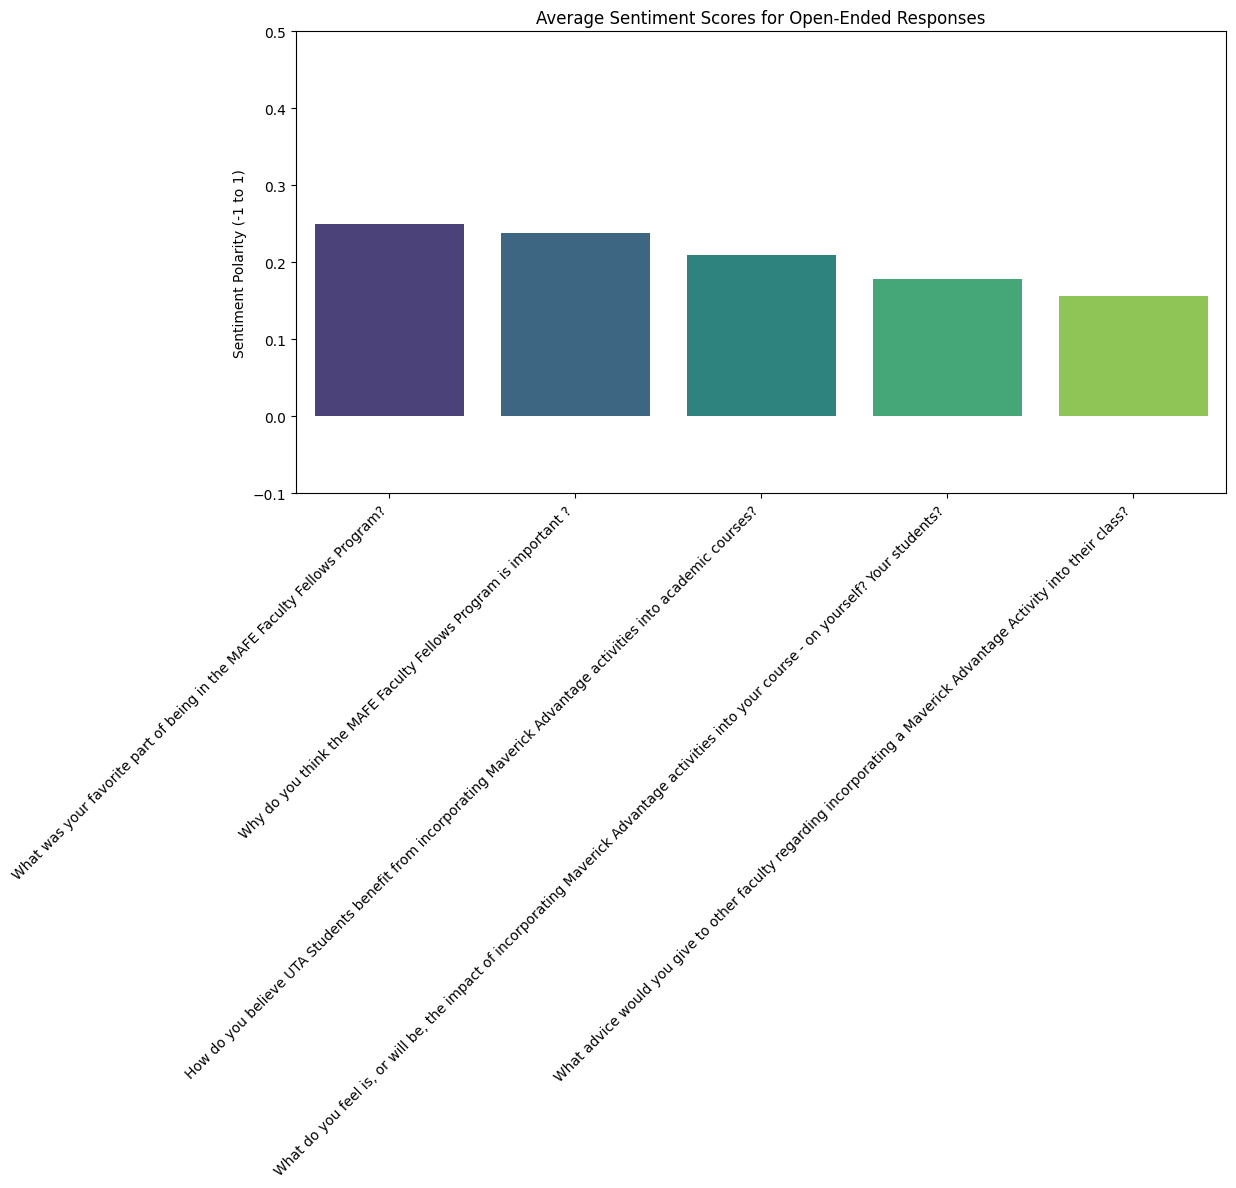

In [ ]:
# Calculate sentiment scores for each text response
text_cols = ['What was your favorite part of being in the MAFE Faculty Fellows Program?',
            'Why do you think the MAFE Faculty Fellows Program is important ?',
            'How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?',
            'What do you feel is, or will be, the impact of incorporating Maverick Advantage activities into your course - on yourself? Your students?',
            'What advice would you give to other faculty regarding incorporating a Maverick Advantage Activity into their class?']

sentiment_scores = []
for col in text_cols:
    sentiment = raw_data[col].apply(lambda x: TextBlob(str(x)).sentiment.polarity if pd.notnull(x) else 0)
    sentiment_scores.append(sentiment.mean())

plt.figure(figsize=(12,6))
sns.barplot(x=text_cols, y=sentiment_scores, palette="viridis")
plt.title('Average Sentiment Scores for Open-Ended Responses')
plt.ylabel('Sentiment Polarity (-1 to 1)')
plt.xticks(rotation=45, ha='right')
plt.ylim(-0.1, 0.5)
plt.show()

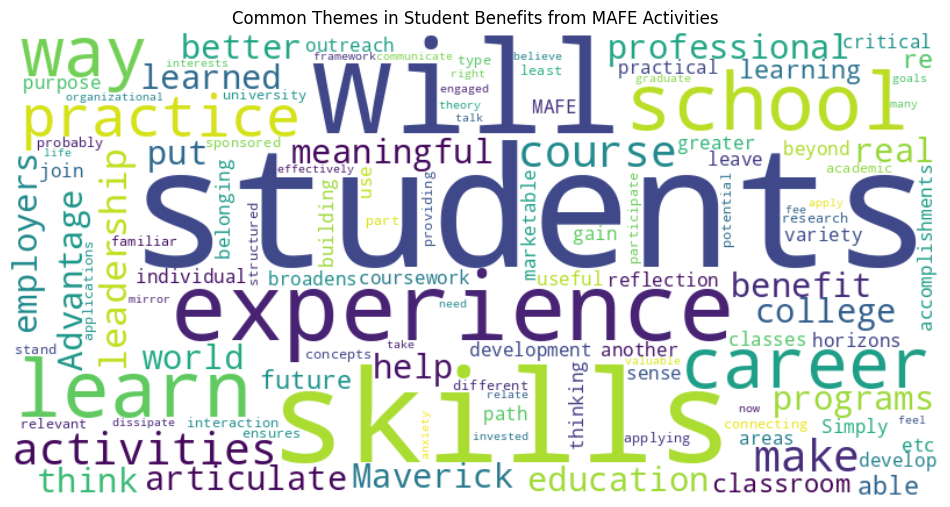

In [ ]:
from wordcloud import WordCloud

benefits_text = ' '.join(raw_data['How do you believe UTA Students benefit from incorporating Maverick Advantage activities into academic courses?'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(benefits_text)

plt.figure(figsize=(12,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Common Themes in Student Benefits from MAFE Activities')
plt.show()

/tmp/ipython-input-1090782644.py:13: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dept_data = raw_data.loc[1:, dept_cols].fillna(0)


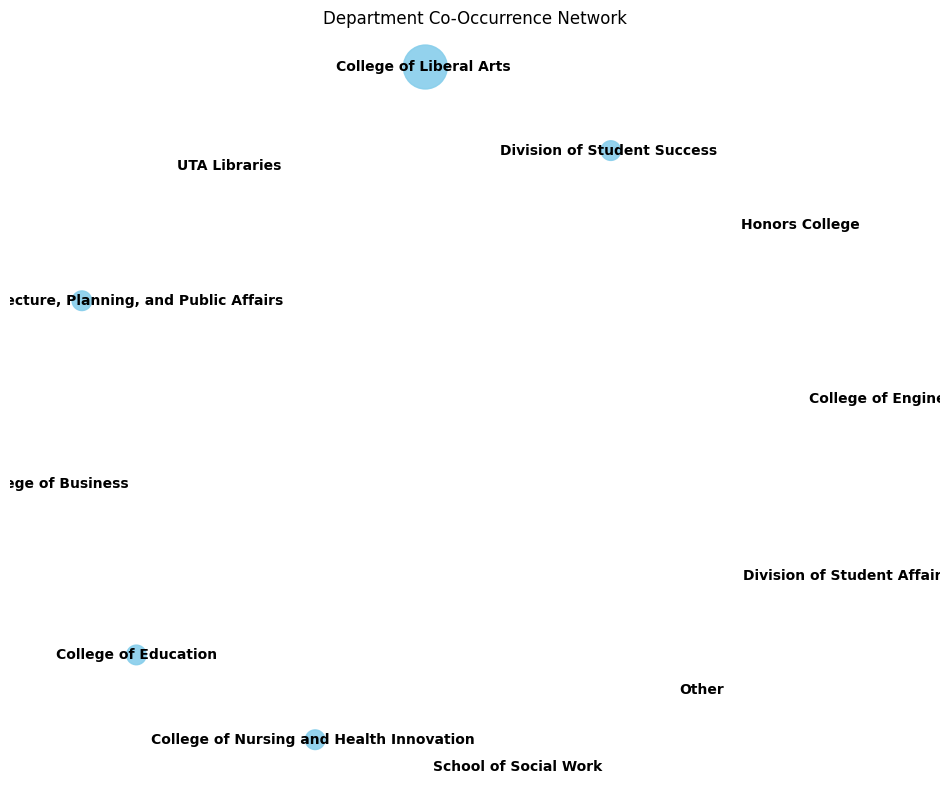

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Identify relevant columns for departments based on the data structure
# These are the 'Unnamed' columns that indicate department affiliation with a '1'
dept_cols = ['Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25',
             'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29',
             'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33']

# Select only these department columns and fill NaN with 0 (assuming NaN means not selected)
# Exclude the header row (index 0)
dept_data = raw_data.loc[1:, dept_cols].fillna(0)

# Convert the data to integer type
dept_data = dept_data.astype(int)


# Create co-occurrence matrix
# Multiply the transposed dataframe by the original dataframe
dept_matrix = dept_data.T.dot(dept_data)

# Create network graph
G = nx.Graph()
# Add nodes with department names (using the original column names for clarity)
# Map 'Unnamed' column names to more readable department names if possible,
# based on the header row (index 0) if it contains meaningful labels.
# Let's check the header row for potential labels first.
header_row = raw_data.iloc[0]
dept_names_map = {}
for col in dept_cols:
    # Use the value in the header row if it's not NaN, otherwise use the column name
    dept_names_map[col] = header_row[col] if pd.notna(header_row[col]) else col

# Add nodes with the mapped department names
for col in dept_cols:
    G.add_node(dept_names_map[col])


# Add edges based on the co-occurrence matrix
for i in range(len(dept_cols)):
    for j in range(i + 1, len(dept_cols)):
        # Use the mapped department names for adding edges
        node1 = dept_names_map[dept_cols[i]]
        node2 = dept_names_map[dept_cols[j]]
        weight = dept_matrix.iloc[i, j]
        if weight > 0:
            G.add_edge(node1, node2, weight=weight)

plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.8) # Adjust k for spacing
# Draw nodes with sizes based on the number of respondents in each department
# Use the diagonal of the co-occurrence matrix for node sizes (number of times a department was selected)
node_sizes = [dept_matrix.iloc[i, i] * 200 for i in range(len(dept_cols))] # Scale node size

# Ensure labels are correctly mapped to the nodes in the graph
labels = {node: node for node in G.nodes()}

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='skyblue', alpha=0.9)

# Draw edges with width based on co-occurrence weight
edge_widths = [d['weight'] * 0.5 for (u, v, d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color='gray', alpha=0.7)

# Draw labels using the mapped names
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_weight='bold')

plt.title('Department Co-Occurrence Network')
plt.axis('off')
plt.show()